In [1]:
##importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Data Pre-processing 

In [2]:
# Import training dataset
train_df = pd.read_csv(r"Google_Stock_Price_Train.csv")
train_df


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
# We will model our prediction on the 'Open' prices
# Extract open column and conver to numpy array
train = train_df.iloc[:, 1:2].values
len(train)

1258

### Feature Scaling

Normalization  
x(norm) = [x−min(x)] / [max(x)−min(x)]

It is recommended to use normalization when the output layer is a sigmoid function

In [5]:
scale = MinMaxScaler(feature_range=(0,1))
train_scaled = scale.fit_transform(train)


#### Modify dataset to make prediction using 30 timesteps

30 past time steps are used to make the prediction at every stage

In [6]:
# 30 previous stock prices before the given day
x_train = []
# Stock price of next day
y_train = []
for i in range(30,len(train_scaled)):
   x_train.append(train_scaled[i-30:i, 0])
   y_train.append(train_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [7]:
#Reshaping the dataset
# Data is 2D converting it to 3D tensor for the training
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [8]:
model = Sequential()
# Add LSTM layer
model.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape
[1], 1)))
# Add Regularization
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Add output layer
model.add(Dense(units = 1))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [10]:
# Compile the model 
model.compile(optimizer= 'adam',
            loss='mean_squared_error')

In [11]:
# Train the model
model.fit(x_train, y_train, epochs = 200, batch_size= 32)

Epoch 1/200
39/39 [==============================] - 17s 88ms/step - loss: 0.0405
Epoch 2/200
39/39 [==============================] - 4s 96ms/step - loss: 0.0058
Epoch 3/200
39/39 [==============================] - 3s 89ms/step - loss: 0.0050
Epoch 4/200
39/39 [==============================] - 3s 84ms/step - loss: 0.0047
Epoch 5/200
39/39 [==============================] - 3s 67ms/step - loss: 0.0053
Epoch 6/200
39/39 [==============================] - 4s 96ms/step - loss: 0.0054
Epoch 7/200
39/39 [==============================] - 3s 83ms/step - loss: 0.0044
Epoch 8/200
39/39 [==============================] - 3s 87ms/step - loss: 0.0045
Epoch 9/200
39/39 [==============================] - 3s 81ms/step - loss: 0.0043
Epoch 10/200
39/39 [==============================] - 3s 68ms/step - loss: 0.0046
Epoch 11/200
39/39 [==============================] - 4s 97ms/step - loss: 0.0057
Epoch 12/200
39/39 [==============================] - 4s 97ms/step - loss: 0.0042
Epoch 13/200
39/39 [====

Epoch 101/200
39/39 [==============================] - 3s 67ms/step - loss: 0.0013
Epoch 102/200
39/39 [==============================] - 3s 66ms/step - loss: 0.0015
Epoch 103/200
39/39 [==============================] - 2s 62ms/step - loss: 0.0015
Epoch 104/200
39/39 [==============================] - 3s 65ms/step - loss: 0.0016
Epoch 105/200
39/39 [==============================] - 3s 66ms/step - loss: 0.0014
Epoch 106/200
39/39 [==============================] - 3s 75ms/step - loss: 0.0015
Epoch 107/200
39/39 [==============================] - 3s 84ms/step - loss: 0.0015
Epoch 108/200
39/39 [==============================] - 3s 72ms/step - loss: 0.0014
Epoch 109/200
39/39 [==============================] - 3s 65ms/step - loss: 0.0013
Epoch 110/200
39/39 [==============================] - 3s 64ms/step - loss: 0.0015
Epoch 111/200
39/39 [==============================] - 2s 64ms/step - loss: 0.0017
Epoch 112/200
39/39 [==============================] - 2s 63ms/step - loss: 0.0013
Epoc

39/39 [==============================] - 3s 81ms/step - loss: 0.0011
Epoch 200/200
39/39 [==============================] - 2s 63ms/step - loss: 0.0012


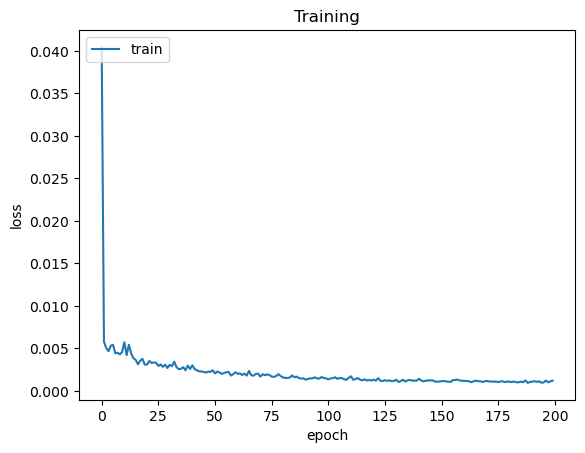

In [12]:
#Plotting reduction in loss as epochs increase 
plt.plot(model.history.history['loss'])
plt.title('Training')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend (['train'], loc= 'upper left')
plt.show()
# we observe that loss reduces as no of epochs increases

### Prediction

In [13]:
# Prepare the Test data

In [14]:
test_df = pd.read_csv("Google_Stock_Price_Test.csv")
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [15]:
stock_price = test_df.iloc[:, 1:2].values

In [16]:
# Fetch 30 timesteps by combining train and test got prediction
total_df = pd.concat((train_df['Open'], test_df['Open']), axis = 0)
inputs = total_df[len(total_df) - len(test_df) -  30:].values
inputs = inputs.reshape(-1, 1)
inputs = scale.transform(inputs)

In [17]:
# Reshape the dataset
x_test = []
for i in range(30, len(inputs)):
   x_test.append(inputs[i-30:i, 0])
   
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [18]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price

1/1 [==============================] - 3s 3s/step


array([[0.9330775 ],
       [0.9292978 ],
       [0.9396101 ],
       [0.93964624],
       [0.948323  ],
       [0.9637693 ],
       [0.967913  ],
       [0.9642023 ],
       [0.9667309 ],
       [0.9694808 ],
       [0.969867  ],
       [0.96856236],
       [0.9678001 ],
       [0.9701645 ],
       [0.9713338 ],
       [0.9888996 ],
       [1.0009527 ],
       [1.0106637 ],
       [1.0086471 ],
       [0.9861195 ]], dtype=float32)

In [19]:
predicted_stock_price = scale.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[780.70514],
       [778.6733 ],
       [784.2168 ],
       [784.2362 ],
       [788.9005 ],
       [797.2038 ],
       [799.4313 ],
       [797.4366 ],
       [798.79584],
       [800.2741 ],
       [800.4817 ],
       [799.78033],
       [799.3706 ],
       [800.6416 ],
       [801.2702 ],
       [810.7128 ],
       [817.19214],
       [822.41235],
       [821.3283 ],
       [809.2184 ]], dtype=float32)

### Visualisation of prediction vs actual 

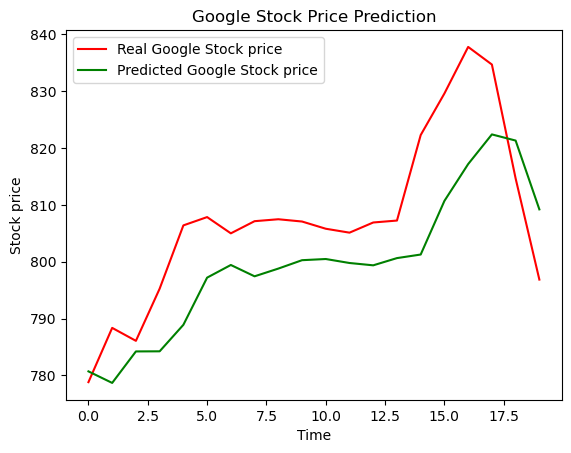

In [20]:
plt.plot(stock_price, color = 'red', label = 'Real Google Stock price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock price')
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()